# Relatório de Análise Estatística dos Dados LDL após 12 semanas de uso

Abstract
Statins are the most common class of drugs used for treating hyperlipdemia.  However, studies have shown that even at their maximum dosage of 80 mg,  many patients do not reach LDL cholesterol goals recommended by the  National Cholesterol Education Program Adult Treatment Panel.  Combination therapy, in which a second cholesterol-reducing agent that  acts via a complementary pathway is coadmininstered with statin, is one  alternative of achieving higher efficacy at lower statin dosage.
In this example, we test the primary hypothesis that coadminstering drug X with statin is more effective at reducing cholesterol levels than  statin monotherapy.
NOTE The dataset used in this example is purely fictitious.
The analysis presented in this example is adapted from the following publication.
Reference Ballantyne CM, Houri J, Notarbartolo A, Melani L, Lipka LJ, Suresh R, Sun S, LeBeaut AP, Sager PT, Veltri EP; Ezetimibe Study Group. Effect of ezetimibe coadministered with atorvastatin in  628 patients with primary hypercholesterolemia: a prospective,  randomized, double-blind trial. Circulation. 2003 May 20;107(19):2409-15.

## Dados
650 pacientes foram designados para se tratarem com um dos 10 grupos de tratamento abaixo:
Placebo
Drug X (10 mg)
Statin (10, 20, 40 or 80 mg)
Drug X (10 mg) + Statin (10, 20, 40 or 80 mg)
As colunas de dados apresentados no estudo são as seguintes:
ID     - ID do paciente (números sequenciais)
Group  - Grupo de Tratamento
Dose_A - Dosagem de Estatina (mg)
Dose_X - Dosagem da Droga X (mg)
Age    - Idade do paciente
Gender - Gênero do paciente
Risk   - Patient CHD risk category (1 is high risk, and 3 is low risk)
LDL_BL - HDL_BL & TC_BL - níveis de LDL na data base.
LDL_12wks , HDL_12wks & TC_12wks - Níveis de LDL após o tratamento (12 semanas)

In [ ]:
using Statistics, CSV, DataFrames, Plots

In [ ]:
# Inclusão de dados
data = CSV.read( "data.csv", delim=";", DataFrame)

In [ ]:
# Transformar números string em float
data = [data[:,1:7] parse.(Float64,replace.(data[:,8:13], ',' => "."))]

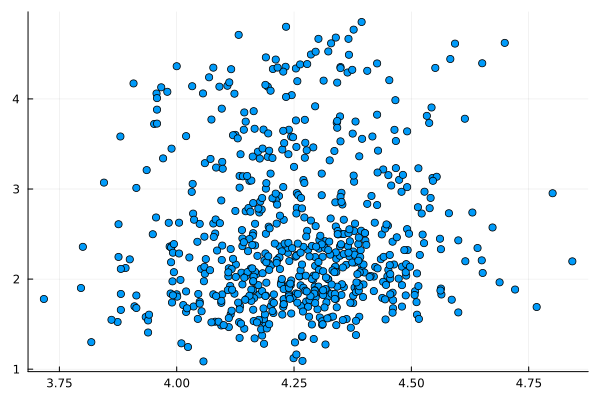

In [32]:
scatter(data.LDL_BL,data.LDL_12wk, label="")

In [33]:
# Média de LDL antes do tratamento:
mean(data.LDL_BL)

4.257678461538461

In [34]:
# Média de LDL após o tratamento:
mean(data.LDL_12wk)

2.486424615384616

A média de LDL após o tratamento, de valor aproximado 2.5, se apresenta mais baixa que a média antes do tratamento, de valor aproximado de 4,2, indicando um indício de sucesso.

## Grupos de resultados
Vejamos quais grupos (Placebo, Druga X, Estatina, Estatina + Droga X) obteve os resultados mais proeminentes:

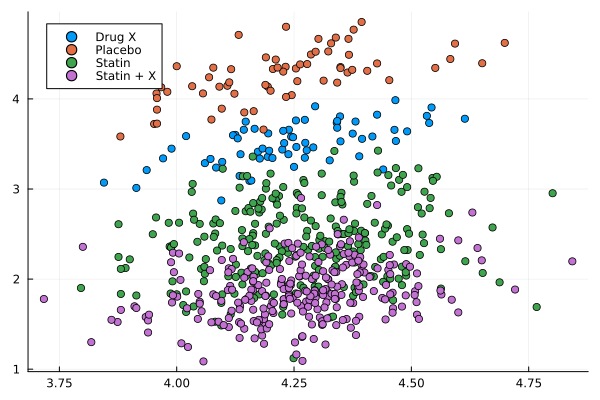

In [35]:
# Gráfico de espalhamento "LDL na Data Base" x "LDL após o tratamento" dividido em grupos:
scatter(data.LDL_BL,data.LDL_12wk, group= data.Group)

Observe que os grupos mais próximos da base foram os que obtiveram melhores resultados no tratamento, indicando que o tratamento em conjunto de Estatina e Droga X melhoram consideravelmente os níveis de LDL em relação aos outros tratamentos observados.

## Porcentagem de melhora do Tratamento
Vejamos agora a porcentagem de melhora dos tratamentos:
Para isso, faremos a diferença entre LDL de cada paciente após o tratamento em relação ao LDL antes do tratamento em forma percentual:

In [36]:
# Nova coluna chamada Change_LDL que informa a diferença percentual
data.Change_LDL = 100*(data.LDL_12wk-data.LDL_BL)./data.LDL_BL

650-element Vector{Float64}:
   8.48442584844259
   0.12327416173569757
   0.11496895838123461
  -5.482691894216296
   2.9536862003780717
   6.467780429594269
  -4.548450889914301
  -4.980468750000004
  -1.3829279923700484
   1.9746121297602381
   ⋮
 -65.11194029850746
 -67.99437675726335
 -58.005187455788736
 -64.56521739130436
 -73.23145181168351
 -59.62747380675204
 -57.68964722158174
 -57.10270822687788
 -58.957804934286365

In [ ]:
# Gráfico de espalhamento indicando cada grupo e a porcentagem de diferença percentual 
# (Quanto menor o percentual, melhor foi o tratamento, pois a diminuição foi mais significativa)
#scatter(data.ID,data.Change_LDL, group=(data.Group,data.Dose_S))

Observamos uma tendência de decrescimento conforme mudamos o grupo de tratamento, que começa a se estabilizar, mesmo com o aumento das doses de Estatina, indicando a hipótese de que o tratamento com Estatina combinada com a Droga X, mesmo em doses mais baixas, tem uma diminuição mais significativa que tratamentos com doses mais altas apenas com a utilização de uma droga.
A tendência pode ser medida, com a indicação de regressão logarítmica:

In [ ]:
using Polynomials

curva = fit(data.ID,data.Change_LDL,3)

In [ ]:
plot!(curva, label="curva polinomial")

In [ ]:
# Regressão linear
#using GLM
#curva_log = fit(data.ID,data.Change_LDL,3)
pfit = GLM.lm(@formula(y ~ 1 + x), DataFrame(data.ID,data.Change_LDL))
#plot!(curva_log, label="curva logaritmica")
#a, b = round.(coef(pfit), sigdigits=3)
#predict(pfit)

In [ ]:
# Regressão log
curva_log = fit(data.ID,data.Change_LDL,3)
plot!(curva_log, label="curva logaritmica")

# histogramas 2d

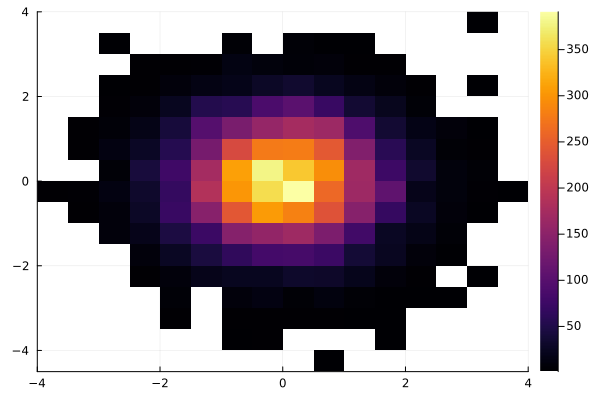

In [22]:
x = randn(10^4)
y = randn(10^4)
histogram2d(x, y)

In [ ]:
using StatsPlots
boxplot(x,y)

In [24]:
using Distributions
#plot(1:5,Normal(3,5), fill=(0, .5,:orange))
Normal(3,5)

Normal{Float64}(μ=3.0, σ=5.0)

In [ ]:
dist = Gamma(2)
scatter(dist, leg=false)
bar!(dist, func=cdf, alpha=0.3)

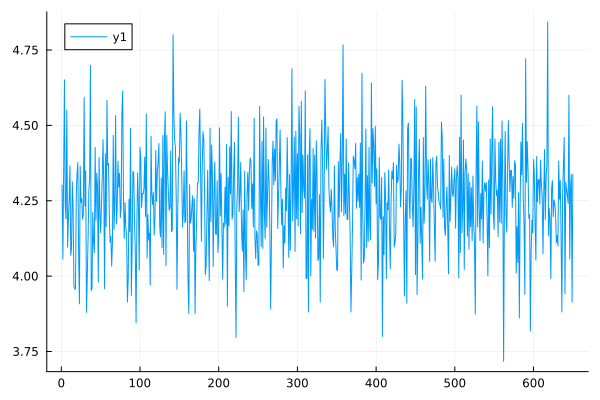

In [26]:
plot(data.LDL_BL, kind="box")